Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step - loss: 0.0108 - val_loss: 7.6782e-04
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - loss: 1.6124e-04 - val_loss: 8.1867e-04
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - loss: 1.5370e-04 - val_loss: 0.0011
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 1.5002e-04 - val_loss: 8.1031e-04
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - loss: 1.4110e-04 - val_loss: 0.0010
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - loss: 1.4019e-04 - val_loss: 0.0011
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - loss: 1.1756e-04 - val_loss: 0.0010
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 1.2853e-04 - val_loss: 7.3091e-04
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - loss: 1.1637e-04 - val_loss: 8.5755e-04
Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - loss: 1.1650e-04 - val_loss: 5.6479e-04
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - loss: 1.2301e-04 - val_loss: 5.2703e-04
E

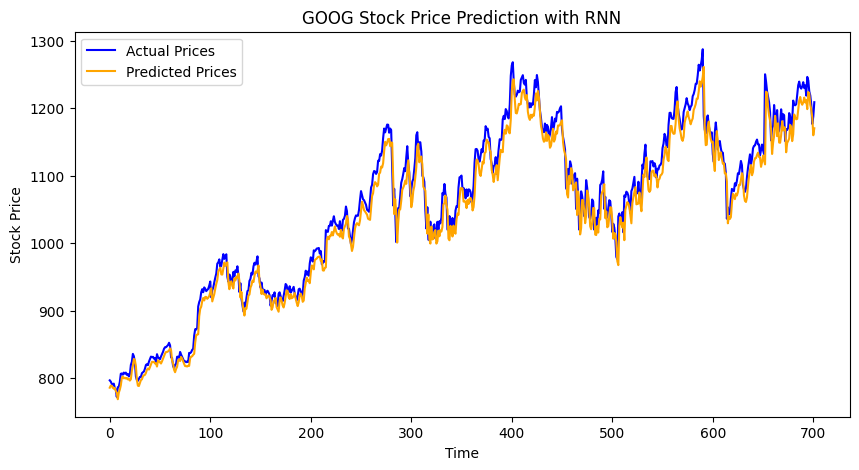

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load dataset
df = pd.read_csv("/content/GOOG.csv")  # Ensure correct filename
df = df[['Close']]  # Focus on closing prices

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.values)

# Create time-series sequences (past 60 days → predict next day)
def create_sequences(data, time_steps=60):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

# Prepare training and test sets
time_steps = 60
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

X_train, y_train = create_sequences(train_data, time_steps)
X_test, y_test = create_sequences(test_data, time_steps)

# Reshape inputs for RNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build RNN Model (Using LSTM)
model = keras.Sequential([
    keras.layers.LSTM(50, return_sequences=True, input_shape=(time_steps, 1)),
    keras.layers.LSTM(50, return_sequences=False),
    keras.layers.Dense(25),
    keras.layers.Dense(1)
])

# Compile model
model.compile(optimizer='adam', loss='mse')

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Make predictions
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)  # Convert back to original scale
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot actual vs. predicted prices
plt.figure(figsize=(10, 5))
plt.plot(y_test, label="Actual Prices", color='blue')
plt.plot(y_pred, label="Predicted Prices", color='orange')
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("GOOG Stock Price Prediction with RNN")
plt.legend()
plt.show()

In [3]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Root Mean Squared Error (RMSE): 476.9133


In [4]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

R² Score: 0.9696


In [5]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Mean Absolute Error (MAE): 17.6013


In [6]:
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Percentage Error (MAPE): 1.63%
